In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
new_df = df.sample(30000, random_state=2)
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
new_df.duplicated().sum()

np.int64(0)

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [ ]:
print(new_df['is_duplicate'].value_counts(), end="\n\n")
print((new_df['is_duplicate'].value_counts() /
      new_df['is_duplicate'].count())*100)

is_duplicate
0    19013
1    10987
Name: count, dtype: int64

is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


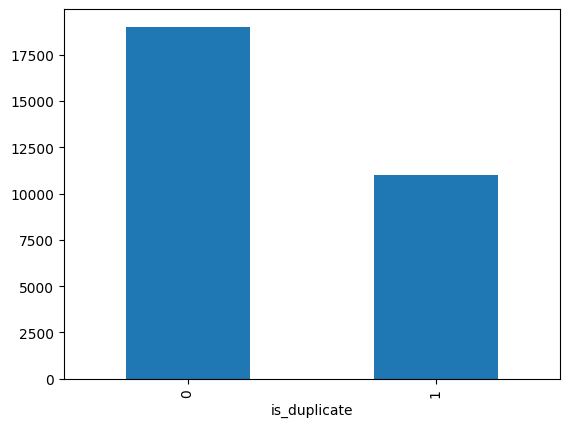

In [9]:
new_df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()

In [10]:
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print("Number of uniqe uestion", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print("Number of question which are repeated: ", x[x].shape[0])

Number of uniqe uestion 55299
Number of question which are repeated:  3480


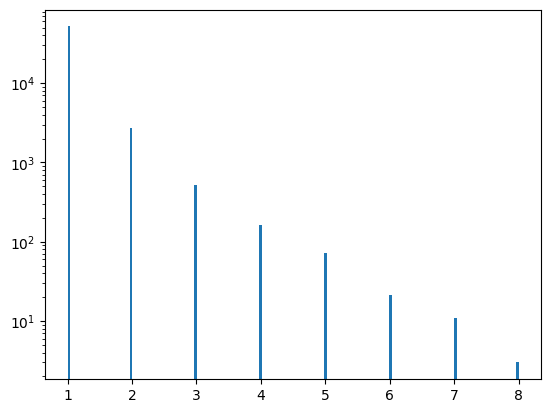

In [ ]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50
...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45


In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x: len(x.split(' ')))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x: len(x.split(' ')))
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9
...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),
             row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),
             row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3
...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),
             row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),
             row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20


In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14,0.43
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24,0.17
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30,0.13
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20,0.25


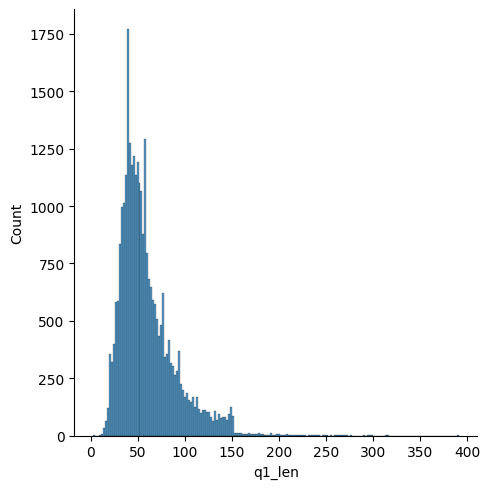

Minimum characters 2
Maximum characters 391
Average num of characters:  59


In [ ]:
# Analysis fearure
sns.displot(new_df['q1_len'])
plt.show()
print("Minimum characters", new_df['q1_len'].min())
print("Maximum characters", new_df['q1_len'].max())
print("Average num of characters: ", int(new_df['q1_len'].mean()))

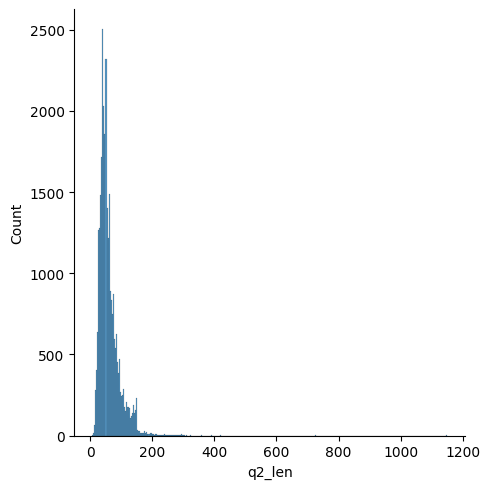

Minimum characters 6
Maximum characters 1151
Average num of characters:  60


In [ ]:
# Analysis fearure
sns.displot(new_df['q2_len'])
plt.show()
print("Minimum characters", new_df['q2_len'].min())
print("Maximum characters", new_df['q2_len'].max())
print("Average num of characters: ", int(new_df['q2_len'].mean()))

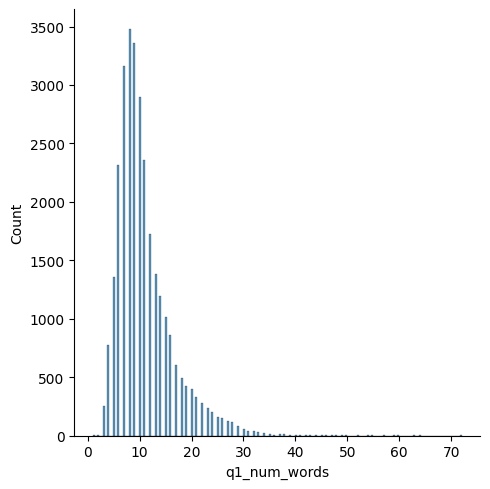

Minimum characters 1
Maximum characters 72
Average num of characters:  10


In [ ]:
# Analysis fearure
sns.displot(new_df['q1_num_words'])
plt.show()
print("Minimum characters", new_df['q1_num_words'].min())
print("Maximum characters", new_df['q1_num_words'].max())
print("Average num of characters: ", int(new_df['q1_num_words'].mean()))

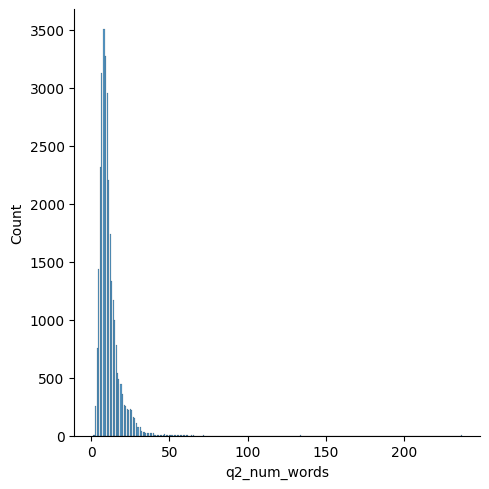

Minimum characters 1
Maximum characters 237
Average num of characters:  11


In [ ]:
# Analysis fearure
sns.displot(new_df['q2_num_words'])
plt.show()
print("Minimum characters", new_df['q2_num_words'].min())
print("Maximum characters", new_df['q2_num_words'].max())
print("Average num of characters: ", int(new_df['q2_num_words'].mean()))

C:\Users\malik\AppData\Local\Temp\ipykernel_12316\287381881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]
C:\Users\malik\AppData\Local\Temp\ipykernel_12316\287381881.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]


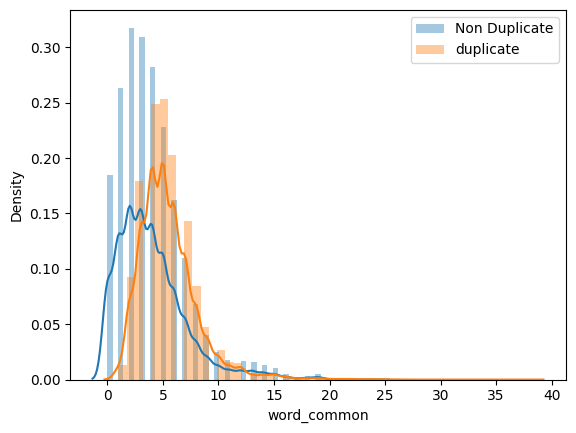

In [44]:
# Common Words
sns.distplot(new_df[new_df['is_duplicate'] == 0]
            ['word_common'], label="Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]
            ['word_common'], label="duplicate")
plt.legend()
plt.show()

C:\Users\malik\AppData\Local\Temp\ipykernel_12316\2372804596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]
C:\Users\malik\AppData\Local\Temp\ipykernel_12316\2372804596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1

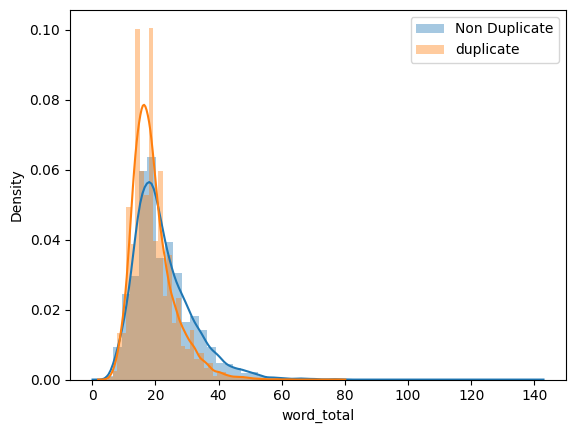

In [46]:
# total words

sns.distplot(new_df[new_df['is_duplicate'] == 0]
            ['word_total'], label="Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]
            ['word_total'], label="duplicate")
plt.legend()
plt.show()

C:\Users\malik\AppData\Local\Temp\ipykernel_12316\4152027493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]
C:\Users\malik\AppData\Local\Temp\ipykernel_12316\4152027493.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1

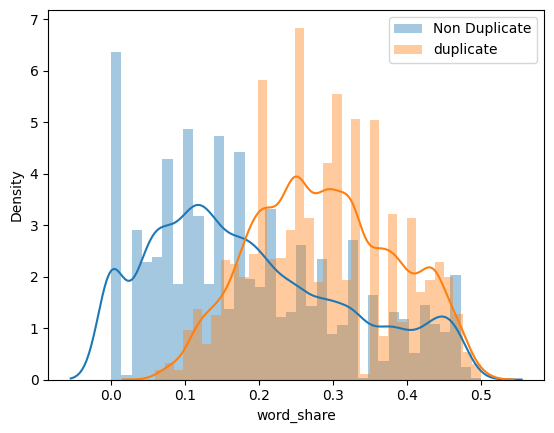

In [48]:
# Words Share

sns.distplot(new_df[new_df['is_duplicate'] == 0]
            ['word_share'], label="Non Duplicate")
sns.distplot(new_df[new_df['is_duplicate'] == 1]
            ['word_share'], label="duplicate")
plt.legend()
plt.show()